
# Insurance Claim Classification Analysis

This notebook covers **Classification Analysis**.  
The goal is to predict whether an insurance claim will occur using classification techniques.

### 2.1 Data Ingestion and doing the descriptive statistics and null value condition checks. Performing Univariate, Bivariate Analysi and Exploratory Data analysis.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
dff = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Holiday_Package.csv')

In [ ]:
#dff=pd.read_csv(r'E:\data Science\Documents created\Great Lakes\Predictive modelling\Project\Holiday_Package.csv')
dff.head(5)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [ ]:
dff.shape

(872, 8)

In [ ]:
dff=dff.iloc[:,1:]

In [ ]:
dff.head(5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,1,1,no
1,yes,37207.0,45.0,8.0,0,1,no
2,no,58022.0,46.0,9.0,0,0,no
3,no,66503.0,31.0,11.0,2,0,no
4,no,66734.0,44.0,12.0,0,2,no


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


We can see that there are 7 columns of which 2 are non numeric, while 5 are numeric columns. Also we can see that there are no null values in the dataset.

The Non numeric columns are Binary, having values Yes and No. Hence we can convert it to numeric, to make it easier for the Machine Learning model to learn from the data.



In [ ]:
dff.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [ ]:
dff.duplicated().sum()

0

We can see that there is only 1 duplicate value, which is very much negligible for the sie of data set with 872 points. Also there is a possibility of boing a valid duplicate value



In [ ]:
print('The number of 0 values in Salary column is {}'.format(dff[dff['Salary']==0].shape[0]))
print('The number of 0 values in age column is {}'.format(dff[dff['age']==0].shape[0]))
print('The number of 0 values in educ column is {}'.format(dff[dff['educ']==0].shape[0]))
print('The number of 0 values in no_young_children column is {}'.format(dff[dff['no_young_children']==0].shape[0]))
print('The number of 0 values in no_older_children column is {}'.format(dff[dff['no_older_children']==0].shape[0]))

The number of 0 values in Salary column is 0
The number of 0 values in age column is 0
The number of 0 values in educ column is 0
The number of 0 values in no_young_children column is 665
The number of 0 values in no_older_children column is 393


We can see that there are a lot of collumns with 0 values in the Number of Young children and Number of Older CHildern.

But practically, they are very much possible, to not have younger or Older children. Hence we need to change anything for it.



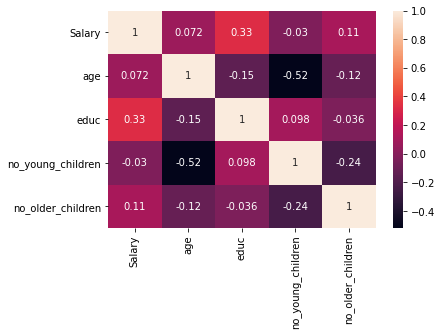

In [ ]:
sns.heatmap(dff[['Salary','age','educ','no_young_children','no_older_children']].corr(),annot=True);

As seen from the above HeatMap, We can observe that for the overall data, there is not much significant correlation.

There is a 0.33 correlation between eduction and Salary, which is practicel.  Also there is a small correlaion between number of older children and salary, Which is also practical, as older children are likely to be working or doing part time jobs.
Also older the person, the more higher position and hence higher the salary.



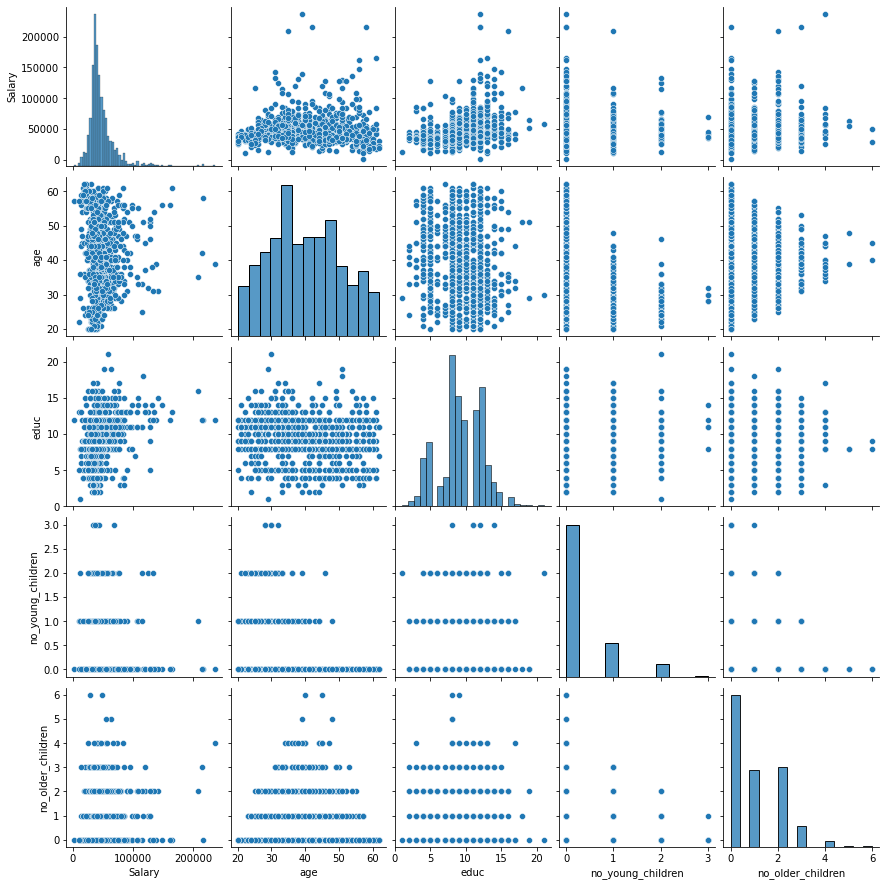

In [ ]:
sns.pairplot(dff[['Salary','age','educ','no_young_children','no_older_children']]);

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gokul\anaconda3\lib\si

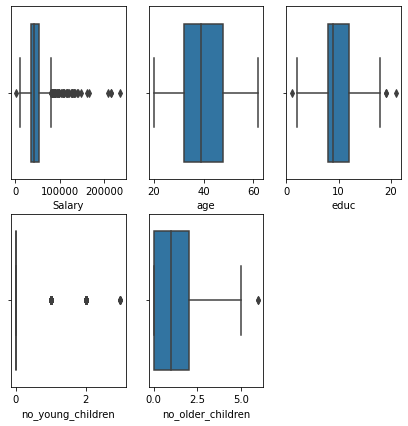

In [ ]:
plt.figure(figsize=[7,7])
for i in range (dff[['Salary','age','educ','no_young_children','no_older_children']].shape[1]):
    plt.subplot(2,3,i+1)
    sns.boxplot(dff[['Salary','age','educ','no_young_children','no_older_children']].iloc[:,i]);

The above plot shows the Box plot for the Numeric variables in the data. The points that lie outside the 3rd and 1st Quartiles are Outliers, That is they are bad for learning the Trend. Hence we can perform Outlier treatment so that the Accuracy of the Model increases.



In [ ]:
## Outlier Treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3= col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

lrSalary,urSalary=remove_outlier(dff['Salary'])
dff['Salary']=np.where(dff['Salary']>urSalary,urSalary,dff['Salary'])
dff['Salary']=np.where(dff['Salary']<lrSalary,lrSalary,dff['Salary'])

lrtravel,urtravel=remove_outlier(dff['educ'])
dff['educ']=np.where(dff['educ']>urtravel,urtravel,dff['educ'])
dff['educ']=np.where(dff['educ']<lrtravel,lrtravel,dff['educ'])

lrtravel,urtravel=remove_outlier(dff['age'])
dff['age']=np.where(dff['age']>urtravel,urtravel,dff['age'])
dff['age']=np.where(dff['age']<lrtravel,lrtravel,dff['age'])

We do not perform Outlier treatent for number of young children and number of older children column as after doing Outlier treatment, there was a lot of reduction in data points.



C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gokul\anaconda3\lib\si

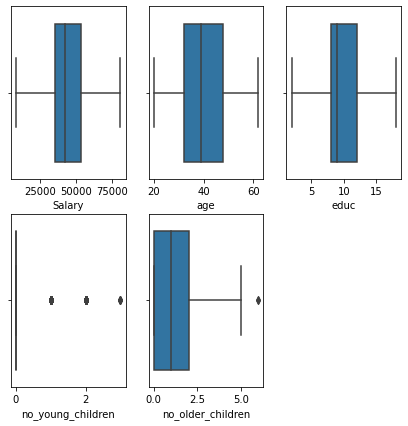

In [ ]:
plt.figure(figsize=[7,7])
for i in range (dff[['Salary','age','educ','no_young_children','no_older_children']].shape[1]):
    plt.subplot(2,3,i+1)
    sns.boxplot(dff[['Salary','age','educ','no_young_children','no_older_children']].iloc[:,i]);

We can see from the Above Boxlot that the Outliers have been removed and Hence the Model is now easier to understand for the Machine learning Model.



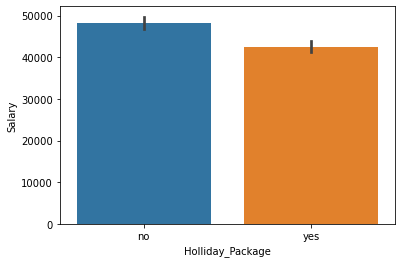

In [ ]:
sns.barplot(x=dff['Holliday_Package'],y=dff['Salary']);

The above is a Bar plot of Holiday Package Acceptance and average Salary, We can see that the average Salary of the people who chose to go to Holiday and Not accept the Holiday Package are nearly the same. The people who refused, have a slightly higher average salary.



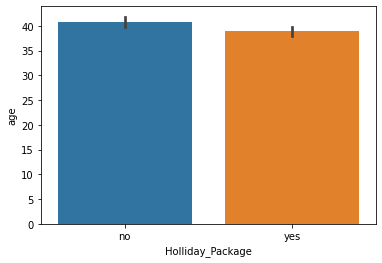

In [ ]:
sns.barplot(x=dff['Holliday_Package'],y=dff['age']);

We can see that The average Age of the people who acepted the Holiday package and the people who did not accept Holiday package is nearly the same with little difference. hence this variable, may ot be very useful to predict whether an employee would go for the Holiday offer or not.



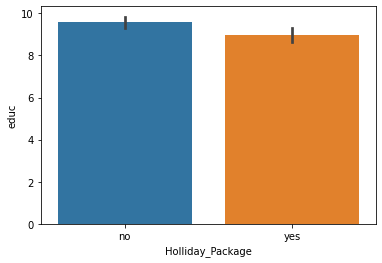

In [ ]:
sns.barplot(x=dff['Holliday_Package'],y=dff['educ']);

We can se that there is not much difference between the average eductaion of people who accepted and did not accept the Holiday Package.



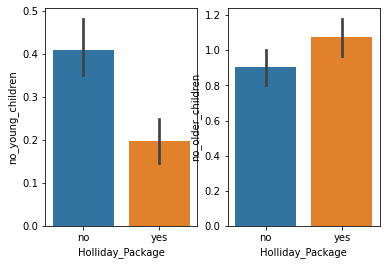

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x=dff['Holliday_Package'],y=dff['no_young_children']);
plt.subplot(1,2,2)
sns.barplot(x=dff['Holliday_Package'],y=dff['no_older_children']);

We can see from the above bar graphs that People who had many yound children, were less likely to accept the Holiday package. This maybe due to the Parents having to take care of the small children.

Also we can see that the people who had many number of Older children, were likely to accept the Holiday package. As older children may not require as much care/attention from the parents as young children.



### 2.2 Encoding the data (having string values) for Modelling.
### Splitting the data into train and test.
### Applying Logistic Regression and LDA (linear discriminant analysis).



In [ ]:
dff_num=dff[['Salary','age','educ','no_young_children','no_older_children']]
dff_cat=dff[['Holliday_Package','foreign']]

In [ ]:
dff_cat.head(5)

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


In [ ]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dff_cat['Holliday_Package']= label_encoder.fit_transform(dff_cat['Holliday_Package'])
dff_cat['foreign']= label_encoder.fit_transform(dff_cat['foreign'])

C:\Users\Gokul\AppData\Local\Temp\ipykernel_25488\3385496531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_cat['Holliday_Package']= label_encoder.fit_transform(dff_cat['Holliday_Package'])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_25488\3385496531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_cat['foreign']= label_encoder.fit_transform(dff_cat['foreign'])


In [ ]:
dff_sum=pd.concat([dff_num,dff_cat],axis=1)
dff_sum.head(5)

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package,foreign
0,48412.0,30.0,8.0,1,1,0,0
1,37207.0,45.0,8.0,0,1,1,0
2,58022.0,46.0,9.0,0,0,0,0
3,66503.0,31.0,11.0,2,0,0,0
4,66734.0,44.0,12.0,0,2,0,0


This the Non numeric variables like Holiday package and Foreign have been encoded. And we can see that Both the non nmerical columns were binary in nature, with values Yes and No.



In [ ]:
# Splitting the Target and the Predictor variables
x = dff_sum.drop('Holliday_Package', axis=1)
y = dff_sum[['Holliday_Package']]
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [ ]:
y_test.shape

(262, 1)

### Logical Regression classifier



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(max_iter=1000,tol=0.001,solver='lbfgs')
#train data
model.fit(x_train, y_train)
y11_predict = model.predict(x_train)

C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#test data
model.fit(x_test, y_test)
y12_predict = model.predict(x_test)

C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Linear Discriminant Classifier



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(solver='svd')
#train data
model=clf.fit(x_train,y_train)
y21_predict = model.predict(x_train)

C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#test data
model=clf.fit(x_test,y_test)
y22_predict = model.predict(x_test)

C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 2.3 Checking the Performance metrics using  Accuracy, Confusion Matrix, ROC_AUC score for each model.



C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The confusion matrix for Logical regression on Train set is as below

[[326   0]
 [284   0]]
The clasfication report for Logical regression on Train set is as below

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610

AUC: 0.709


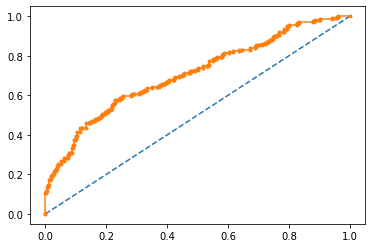

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
print('The confusion matrix for Logical regression on Train set is as below\n')
print(confusion_matrix(y_train,y11_predict))
print('The clasfication report for Logical regression on Train set is as below\n')
print(classification_report(y_train,y11_predict))

# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

The confusion matrix for Logical regression on Test set is as below

[[115  30]
 [ 88  29]]
The clasfication report for Logical regression on Test set is as below

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       145
           1       0.49      0.25      0.33       117

    accuracy                           0.55       262
   macro avg       0.53      0.52      0.50       262
weighted avg       0.53      0.55      0.51       262

AUC: 0.717


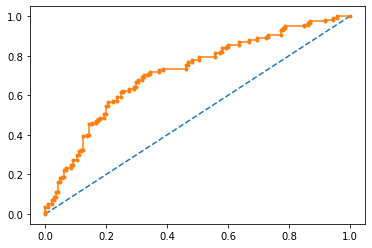

In [ ]:
print('The confusion matrix for Logical regression on Test set is as below\n')
print(confusion_matrix(y_test,y12_predict))
print('The clasfication report for Logical regression on Test set is as below\n')
print(classification_report(y_test,y12_predict))

# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

The confusion matrix for Linear Discriminate Classifier on Train set is as below

[[254  72]
 [126 158]]
The clasfication report for Linear Discriminate Classifier on Train set is as below

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610

AUC: 0.709


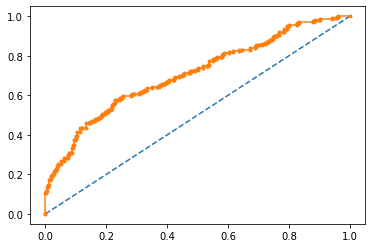

In [ ]:
print('The confusion matrix for Linear Discriminate Classifier on Train set is as below\n')
print(confusion_matrix(y_train,y21_predict))
print('The clasfication report for Linear Discriminate Classifier on Train set is as below\n')
print(classification_report(y_train,y21_predict))

# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

The confusion matrix for Linear Discriminate Classifier on test set is as below

[[112  33]
 [ 50  67]]
The clasfication report for Linear Discriminate Classifier on test set is as below

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       145
           1       0.67      0.57      0.62       117

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.68       262

AUC: 0.717


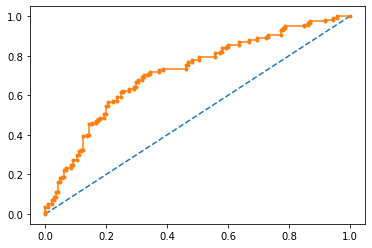

In [ ]:
print('The confusion matrix for Linear Discriminate Classifier on test set is as below\n')
print(confusion_matrix(y_test,y22_predict))
print('The clasfication report for Linear Discriminate Classifier on test set is as below\n')
print(classification_report(y_test,y22_predict))

# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 2.4 Inference Basis on these predictions, what are the insights and recommendations.



Insights and Recommendations
    
1. We can see that the variable number of young children was inversely related to the employee accepting the Holiday Package. he reason maybe that they have to look after their young children hence are less likely to accept the package. So plans can include looking after the babay, so that the parents are free to travel, by tying up partnership with a day care institution.

2. We can also see that the variable number of older chldren correlated positively with Employee accepting the Package, as older children can travel and require less attention and care from the parents, hence the destinations can include places that even older children will enjoy, which might satisfy the customers and hence increase business.

3. When using a machine learning model to predict the acceptance of Holiday Package, Linear Discriminate Analysis gives a much better prediction than Logistic Regression.

4. Also we can see that salary and eduction are correlated, In case of outside office customers, this may help in advertising in High income places like offices, High end restaurants, as the more the available money, the more likely they are to pay for the Holiday package.

